In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В юпитере можно отдавать команды в терминал

In [2]:
!pip install seaborn

In [3]:
df = pd.read_csv('../lesson1_pandas/data/telecom_churn.csv')

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Отображение признаков по одному

## 1.1. Количественные признаки

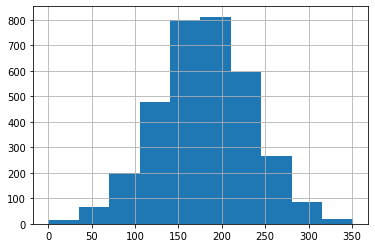

In [5]:
df['Total day minutes'].hist();

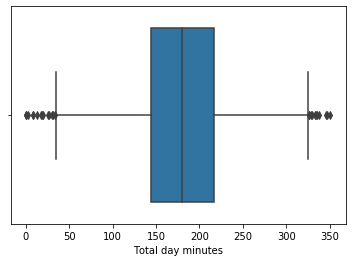

In [6]:
sns.boxplot(df['Total day minutes'])

## 1.2. Категориальные признаки

In [7]:
df['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [8]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

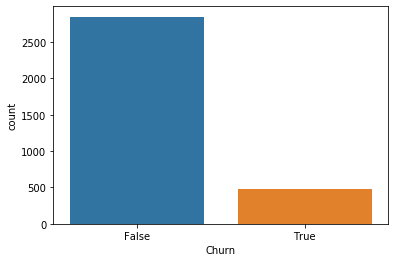

In [9]:
sns.countplot(df['Churn'])

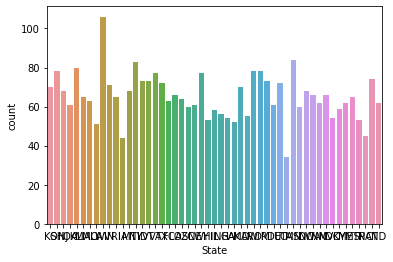

In [10]:
sns.countplot(df['State'])

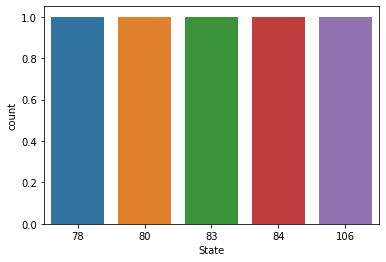

In [11]:
sns.countplot(df['State'].value_counts().head())

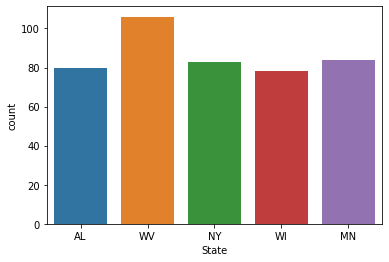

In [12]:
sns.countplot(df[df['State'].isin(df['State'].value_counts().head().index)]['State']);

# 2. Взаимодействия признаков

## 2.1 Количественные-колич.

In [13]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [14]:
# Отбираем признаки в которых есть слово charge
feat = [f for f in df.columns if 'charge' in f]
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

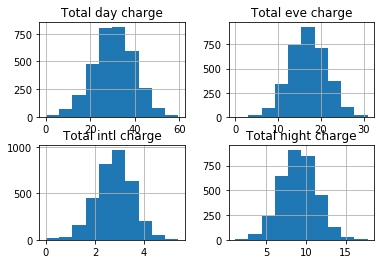

In [15]:
df[feat].hist();

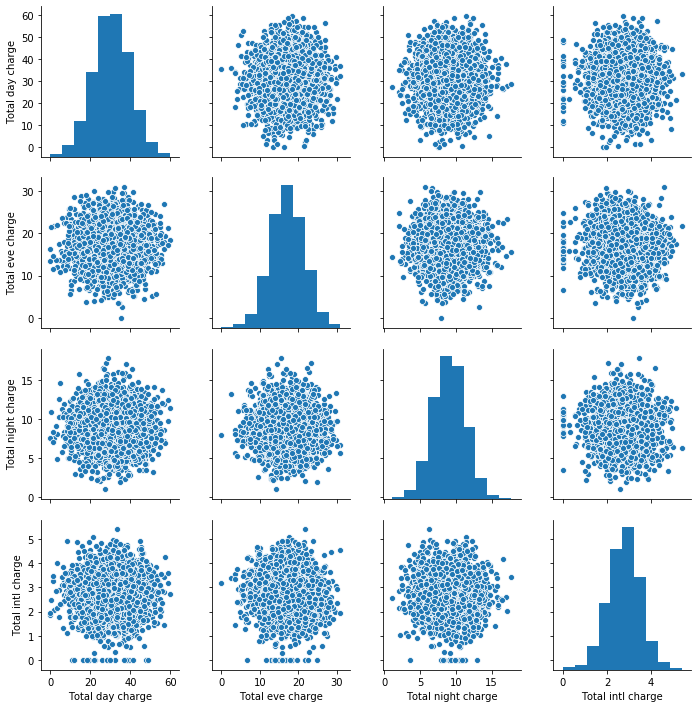

In [16]:
# Строим зависимость признаков друг от друга
sns.pairplot(df[feat])

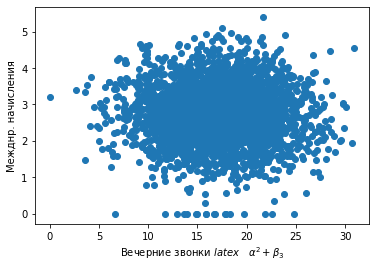

In [17]:
plt.scatter(df['Total eve charge'], df['Total intl charge']);
plt.xlabel(r'Вечерние звонки $latex \quad \alpha^2 + \beta_3$');
plt.ylabel('Межднр. начисления');

In [18]:
# Покрасим вручную признак
df['Churn'].map({False: 'blue', True: 'red'}).head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

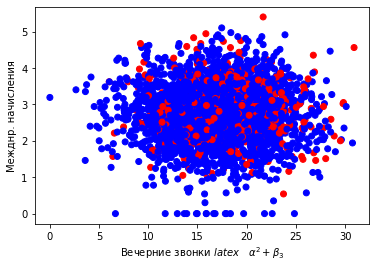

In [19]:
plt.scatter(df['Total eve charge'], df['Total intl charge'], color=df['Churn'].map({False: 'blue', True: 'red'}));
plt.xlabel(r'Вечерние звонки $latex \quad \alpha^2 + \beta_3$');
plt.ylabel('Межднр. начисления');

In [20]:
# Отбираются только True Churn
df[df["Churn"]].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


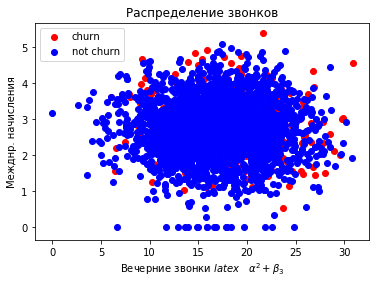

In [21]:
plt.scatter(df[df['Churn']]['Total eve charge'], df[df['Churn']]['Total intl charge'], color='red', label='churn');
plt.scatter(df[~df['Churn']]['Total eve charge'], df[~df['Churn']]['Total intl charge'], color='blue', label='not churn');
plt.xlabel(r'Вечерние звонки $latex \quad \alpha^2 + \beta_3$');
plt.ylabel('Межднр. начисления');
plt.title('Распределение звонков');
plt.legend();

In [22]:
# Нахождение корреляции между признаками (корреляция Пирсона)
df.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


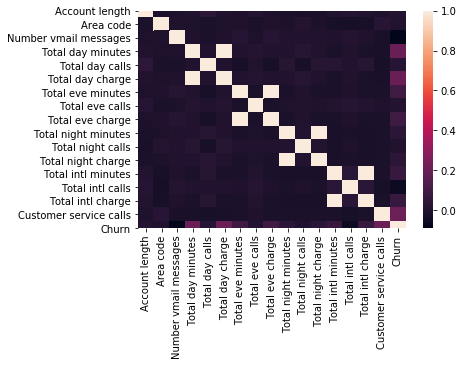

In [23]:
sns.heatmap(df.corr())

In [24]:
# Удаление данных из базы данных
df.drop(feat, axis=1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False
3329,WV,68,415,No,No,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False
3330,RI,28,510,No,No,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False
3331,CT,184,510,Yes,No,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False


In [25]:
# База не изменилась
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [26]:
# Чтобы изменить датафрейм, нужно указать свойство inplace=True
df.drop(feat, axis=1, inplace=True)

In [27]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

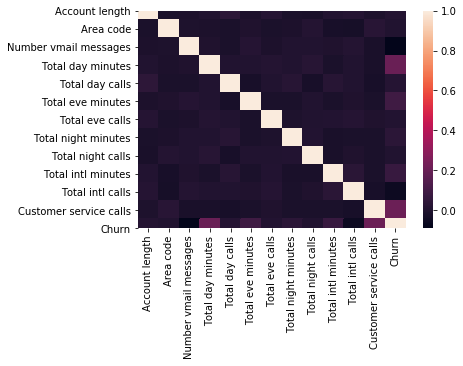

In [28]:
sns.heatmap(df.corr())

## 2.2. Колич.-категор. + колич.-бинарный

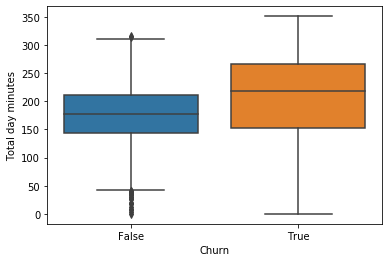

In [29]:
sns.boxplot(x='Churn', y='Total day minutes', data=df)

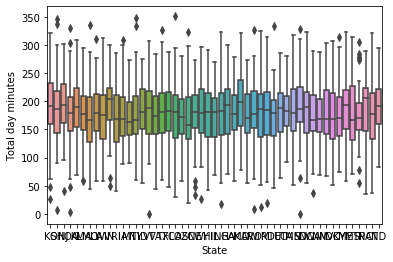

In [30]:
sns.boxplot(x='State', y='Total day minutes', data=df)

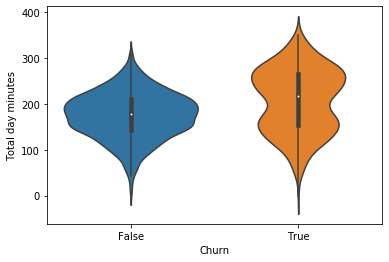

In [31]:
sns.violinplot(x='Churn', y='Total day minutes', data=df)

In [32]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

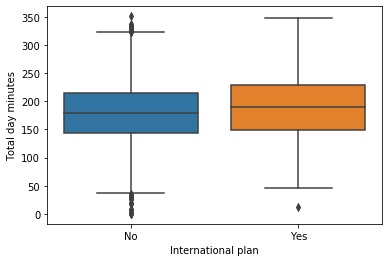

In [33]:
sns.boxplot(x='International plan', y='Total day minutes', data=df)

## 2.3. Категориальный-катег.

In [34]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


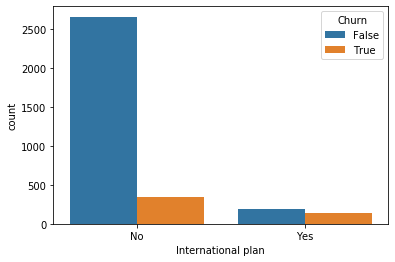

In [35]:
sns.countplot(x='International plan', hue='Churn', data=df);

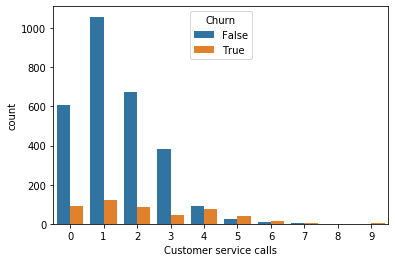

In [36]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

# Гипотеза компактности

In [37]:
from sklearn.manifold import TSNE

In [38]:
# Загружаем метод "сохранение соседства" TSNE
tsne = TSNE(random_state=0)

In [39]:
# Метод TSNE требует чтобы были только количественные признаки. Поэтому изменяем датафрейм
df2 = df.drop('State', axis=1)

In [40]:
df2['International plan'] = df2['International plan'].map({'Yes': 1, 'No': 0})

In [41]:
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [42]:
df2.head(3)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False


In [43]:
%%time
tsne.fit(df2)

Wall time: 2min 6s


TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30.0,
     random_state=0, verbose=0)

In [44]:
tsne.embedding_.shape

(3333, 2)

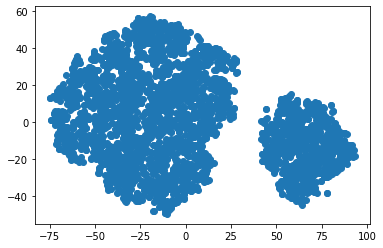

In [45]:
plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1]);

In [46]:
df2['Churn'].values

array([False, False, False, ..., False, False, False])

In [47]:
tsne.embedding_[df['Churn'].values, 0].shape

(483,)

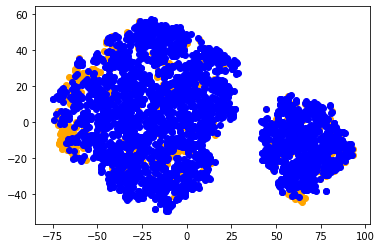

In [48]:
plt.scatter(tsne.embedding_[df['Churn'].values, 0], tsne.embedding_[df['Churn'].values, 1], color='orange');
plt.scatter(tsne.embedding_[~df['Churn'].values, 0], tsne.embedding_[~df['Churn'].values, 1], color='blue');